Notre projet consiste à comprendre et à relater l'évolution de la température en Ile de france.
hors mis celà nous devons également etre en mesure de donner grace au machine learning une prédiction sur les températures moyennes avenir.
pour réaliser notre modèle de ML opérationnell et propre à cette tache nous passerons par les étapes suivantes:

#### Importations des bibliothèques

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib

#### Lecture des données

In [2]:
df = pd.read_excel("data_clean_idf.xlsx")

#affichage de dataframe 
df

,YEAR,MONTH,LAT,LON,ALTI,RR,PMERM,TX,TXMIN,TN,...,TM,TMM,TMMIN,TMMAX,UMM,TSVM,ETP,FFM,INST,GLOT
0,1950,1,48.8,2.5,81.2,25.9,1022.3,5.1,-2.4,-0.7,...,2.2,2.2,-4.5,8.7,90.000000,6.7,9.0,3.6,3165.0,NaN
1,1950,2,48.8,2.5,81.8,64.6,1012.3,10.6,3.5,3.2,...,6.9,6.8,0.3,11.3,81.515789,8.2,27.5,6.2,5728.4,NaN
2,1950,3,48.8,2.5,81.8,20.3,1021.3,12.6,5.4,2.8,...,7.7,7.7,0.8,12.2,80.300000,8.2,49.9,3.6,9676.8,NaN
3,1950,4,48.8,2.5,81.8,63.6,1010.5,13.7,8.4,4.2,...,9.0,8.7,4.4,14.5,81.515789,8.4,80.0,4.8,8836.2,NaN
4,1950,5,48.8,2.5,81.8,59.1,1016.0,20.3,12.2,8.9,...,14.6,14.3,8.6,19.9,75.000000,12.1,112.2,3.2,13103.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2023,12,48.8,2.4,101.9,68.4,1016.7,9.6,2.9,5.2,...,7.4,7.3,0.0,11.4,87.500000,9.2,13.9,4.4,2443.2,7181.9
888,2024,1,48.8,2.4,101.9,63.0,1020.3,7.3,-1.7,1.5,...,4.4,4.1,-2.6,12.8,84.700000,7.4,13.7,3.9,4952.0,10839.3
889,2024,2,48.8,2.4,101.9,85.2,1014.1,11.5,8.1,6.4,...,8.9,8.7,5.1,13.3,87.400000,9.9,22.1,4.2,2074.2,11599.0
890,2024,3,48.8,2.4,101.9,88.1,1008.1,14.0,8.3,5.7,...,9.9,9.3,5.7,14.6,81.900000,9.5,50.8,3.4,7509.8,30544.1


#### Compréhension des données

data_clean.xlsx est un jeu de données sur l'historique des températures en ile de france au cours des 73 dernières années.
ces données proviennent du site officiel de météo en france : "meteo.data.gouv.fr".
elles ont été téléchargé au format CSV.GZ et convertit en format CSV grace à un outil dee conversion en ligne appelé EZYZIP.

le dataset est constitué de 22 colonnes à savoir:

- AAAAMM : Il s'agit probablement d'une colonne indiquant la date au format AAAA (année) et MM (mois).
- LAT : Latitude géographique.
- LON : Longitude géographique.
- ALTI : Altitude.
- RR : Précipitations.
- PMERM : Probabilité de mer.
- TX : Température maximale quotidienne.
- TXMIN : Température minimale quotidienne.
- TN : Température minimale quotidienne.
- TNMAX : Température maximale quotidienne.
- TAMPLIM : Amplitude thermique limite.
- TM : Température moyenne quotidienne.
- TMM : Température moyenne mensuelle.
- TMMIN : Température minimale mensuelle.
- TMMAX : Température maximale mensuelle.
- UMM : Humidité moyenne mensuelle.
- TSVM : Température du sol à différentes profondeurs.
- ETP : Évapotranspiration potentielle.
- FFM  : moyenne mensuelle de la force moyenne quotidienne du vent moyennÃ© sur 10 mn (FFM), Ã  10 m (en m/s et 1/10)
- INST : cumul mensuel des durÃ©es totales dâ€™insolation quotidiennes (en mn)
- GLOT : cumul mensuel du rayonnement global quotidien (en J/cm2)

#### Choix des données.

Ce que nous voulons c'est de pouvoir mettre sur pieds en modèle qui en fonction de l'année entré, du mois pourra nous donner la température moyenne prévu.
de cela on retient que nos features sont:
 - année 
 - mois 
 
et notre cible est: 

 - température moyenne .

In [3]:
df.columns

Index(['YEAR', 'MONTH', 'LAT', 'LON', 'ALTI', 'RR', ' PMERM', 'TX', 'TXMIN',
       ' TN', 'TNMAX', ' TAMPLIM', 'TM', 'TMM', 'TMMIN', 'TMMAX', 'UMM',
       'TSVM', 'ETP', 'FFM', ' INST', 'GLOT'],
      dtype='object')

In [4]:
# définition du dataset 
df1 = df[['YEAR', 'MONTH', 'LAT', 'LON', 'ALTI', 'RR', ' PMERM', 'TX', 'TXMIN',
       ' TN', 'TNMAX', ' TAMPLIM', 'TM', 'TMM', 'TMMIN', 'TMMAX', 'UMM',
       'TSVM', 'ETP', 'FFM', ' INST']]
df1.head(5)

,YEAR,MONTH,LAT,LON,ALTI,RR,PMERM,TX,TXMIN,TN,...,TAMPLIM,TM,TMM,TMMIN,TMMAX,UMM,TSVM,ETP,FFM,INST
0,1950,1,48.8,2.5,81.2,25.9,1022.3,5.1,-2.4,-0.7,...,5.8,2.2,2.2,-4.5,8.7,90.000000,6.7,9.0,3.6,3165.0
1,1950,2,48.8,2.5,81.8,64.6,1012.3,10.6,3.5,3.2,...,7.4,6.9,6.8,0.3,11.3,81.515789,8.2,27.5,6.2,5728.4
2,1950,3,48.8,2.5,81.8,20.3,1021.3,12.6,5.4,2.8,...,9.9,7.7,7.7,0.8,12.2,80.300000,8.2,49.9,3.6,9676.8
3,1950,4,48.8,2.5,81.8,63.6,1010.5,13.7,8.4,4.2,...,9.5,9.0,8.7,4.4,14.5,81.515789,8.4,80.0,4.8,8836.2
4,1950,5,48.8,2.5,81.8,59.1,1016.0,20.3,12.2,8.9,...,11.4,14.6,14.3,8.6,19.9,75.000000,12.1,112.2,3.2,13103.6


#### Création d'un ensemble de données test et d'entrainement

In [5]:
# Séparation des features et la cible
X1 = X = df1[['YEAR', 'MONTH']]
y = df1['TM']

In [6]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

#### Entrainement du modèle 

In [7]:
# Choix du modèle
LR = LinearRegression()

In [8]:
# Entraînement du modèle
LR.fit(X_train, y_train)

LinearRegression()

#### Prédictions

In [9]:
# prédictions sur l'ensemble de test
predictions = LR.predict(X_test)

#### Evaluation du modèle 

In [10]:
# Évaluation du modèle avec la MSE
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 29.424043349334962


In [11]:
# Calcul du coefficient de détermination (R carré)
r2 = r2_score(y_test, predictions)
print("Coefficient de détermination (R carré) :", r2) 

Coefficient de détermination (R carré) : 0.06272939839495795


cela implique que notre modèle LR a une erréur quadratique moyenne de 5,426 °c.

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialisation des listes pour stocker les métriques
degrees = []
mse_values = []
mae_values = []
r2_values = []

# Création des fonctionnalités polynomiales
for i in range(6):
    degree = i  
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X1)

    # Entraînement du modèle de régression polynomiale
    model1 = make_pipeline(PolynomialFeatures(degree),StandardScaler(),LinearRegression())
    model1.fit(X_poly, y)

    # Prédictions avec le modèle entraîné
    predictions = model1.predict(X_poly)

    # Prédictions sur l'ensemble de test
    predictions_test = model1.predict(poly_features.transform(X_test))

    # Calcul des métriques d'évaluation
    mse = mean_squared_error(y_test, predictions_test)
    mae = mean_absolute_error(y_test, predictions_test)
    r2 = r2_score(y_test, predictions_test)

    # Ajout des valeurs aux listes
    degrees.append(degree)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

    # Création du DataFrame
    metrics_df = pd.DataFrame({
        'Degré du polynôme': degrees,
        'Erreur quadratique moyenne (EQM)': mse_values,
        'Erreur absolue moyenne (EAM)': mae_values,
        'Coefficient de détermination (R²)': r2_values
    })

In [40]:
# Affichage du DataFrame
metrics_df

,Degré du polynôme,Erreur quadratique moyenne (EQM),Erreur absolue moyenne (EAM),Coefficient de détermination (R²)
0,0,31.399830,4.879947,-0.000207
1,1,29.393864,4.654577,0.063691
2,2,2.516781,1.243617,0.919831
3,3,2.662990,1.330196,0.915173
4,4,2.571377,1.203755,0.918092
5,5,32.004523,4.247665,-0.019469


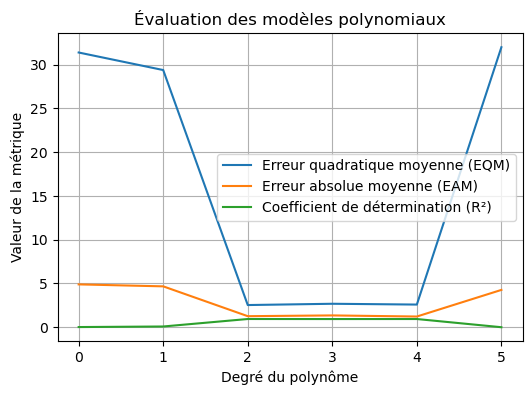

In [41]:
# Création du graphique
plt.figure(figsize=(6, 4))
plt.plot(range(6), mse_values, label='Erreur quadratique moyenne (EQM)')
plt.plot(range(6), mae_values, label='Erreur absolue moyenne (EAM)')
plt.plot(range(6), r2_values, label='Coefficient de détermination (R²)')
plt.xlabel('Degré du polynôme')
plt.ylabel('Valeur de la métrique')
plt.title('Évaluation des modèles polynomiaux')
plt.legend()
plt.xticks(range(6))
plt.grid(True)
plt.show()

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Définition de la grille des hyperparamètres
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20]
}

# Initialisation du modèle avec recherche d'hyperparamètres
rf_model_cv = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)

# Entraînement du modèle avec recherche d'hyperparamètres
rf_model_cv.fit(X_train, y_train)

# Obtention des meilleurs hyperparamètres
best_params_rf = rf_model_cv.best_params_

# Entraînement du modèle avec les meilleurs hyperparamètres
rf_model_best = RandomForestRegressor(**best_params_rf, random_state=42)
rf_model_best.fit(X_train, y_train)

# Prédictions
rf_predictions_best = rf_model_best.predict(X_test)

# Évaluation des performances
rf_mse_best = mean_squared_error(y_test, rf_predictions_best)
rf_mae_best = mean_absolute_error(y_test, rf_predictions_best)
rf_r2_best = r2_score(y_test, rf_predictions_best)
print(rf_r2_best, rf_mae_best, rf_mse_best)

0.9055488447863382 1.3029283170485906 2.965136088385126


On constate que le meilleur modèle est celui de regression polynomiale de dégré 3 car il possède le meilleur R carré ainsi qu'une EAM minimale

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Création des fonctionnalités polynomiales
degree = 3  # Degré du polynôme
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X1)  # X_subset est le sous-ensemble de vos fonctionnalités "YEAR" et "MONTH"

# Entraînement du modèle de régression polynomiale
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_poly, y)

# Prédictions avec le modèle entraîné
predictions = model.predict(X_poly)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

# Affichage des métriques
print('Erreur quadratique moyenne (EQM):', mse)
print('Erreur absolue moyenne (EAM):', mae)
print('Coefficient de détermination (R²):', r2)

Erreur quadratique moyenne (EQM): 2.5023306114230204
Erreur absolue moyenne (EAM): 1.2210724768274528
Coefficient de détermination (R²): 0.9246877815772281


In [50]:
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X_train)

mod = make_pipeline(PolynomialFeatures(degree), LinearRegression())
mod.fit(X_poly, y_train)

X_test_poly = poly_features.transform(X_test)
predictions = mod.predict(X_test_poly)

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Erreur quadratique moyenne (EQM):', mse)
print('Erreur absolue moyenne (EAM):', mae)
print('Coefficient de détermination (R²):', r2)

Erreur quadratique moyenne (EQM): 2.4240970569162266
Erreur absolue moyenne (EAM): 1.2134078031172493
Coefficient de détermination (R²): 0.9227830492257538


In [52]:
new_data = np.array([[2024, 3]])

new_data_poly = poly_features.transform(new_data)

prediction = mod.predict(new_data_poly)

print("Prédiction pour l'année 2023 et le mois 2:", prediction)

Prédiction pour l'année 2023 et le mois 2: [8.61813522]


C:\Users\mbako\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [62]:
# Enregistrement du modèle avec joblib
joblib.dump(mod, 'model_polynomial_degree5.pkl')

['model_polynomial_degree5.pkl']